<a href="https://colab.research.google.com/github/felipefr/numerical_analysis/blob/main/intro_python_scientifique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
import math
from matplotlib import pyplot as plt

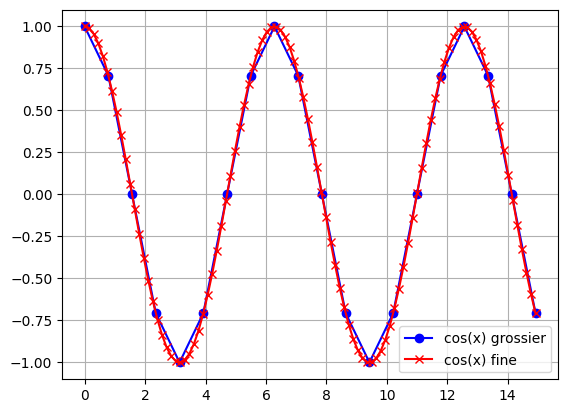

In [16]:
z = np.zeros(20)
x = np.zeros(20)
for i in range(20):
  x[i] = i*math.pi/4
  z[i] = math.cos(x[i])

plt.plot(x, z, 'b-o', label = 'cos(x) grossier')

x = np.linspace(x[0], x[-1], 100)
plt.plot(x, np.cos(x), 'r-x', label = 'cos(x) fine')

plt.legend()
plt.grid()

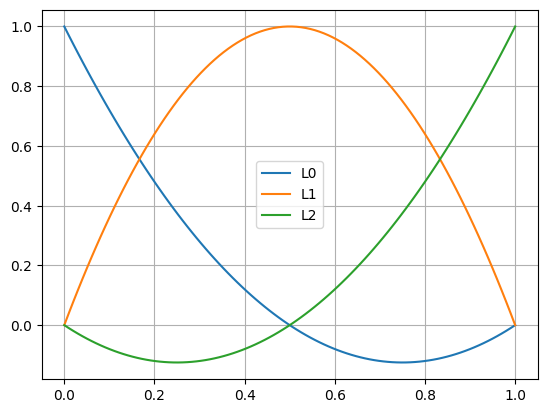

In [29]:
lag_points = [0,0.5,1.0]
L0 = sp.interpolate.lagrange(lag_points,[1,0,0])
L1 = sp.interpolate.lagrange(lag_points,[0,1,0])
L2 = sp.interpolate.lagrange(lag_points,[0,0,1])

x = np.linspace(0.0,1.0,100)
plt.plot(x, L0(x), label = 'L0')
plt.plot(x, L1(x), label = 'L1')
plt.plot(x, L2(x), label = 'L2')
plt.grid()
plt.legend()

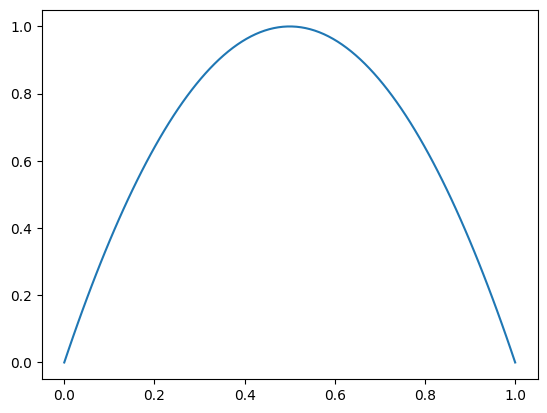

In [25]:
x = np.linspace(0,1.0,100)
plt.plot(x, p(x))